In [99]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

# fr = pd.read_csv('../data/final_clean.csv')
fr = pd.read_csv('../data/final_clean_r2.csv')
labels = fr['outcome'].copy()

In [69]:
mapper = {
    'applicant_race':{
        'American Indian/Alaska Native':0b0000000000000000001,
        'Asian':0b0000000000000000010,
        'Asian Indian':0b0000000000000000100,
        'Chinese':0b0000000000000001000,
        'Filipino':0b0000000000000010000,
        'Japanese':0b0000000000000100000,
        'Korean':0b0000000000001000000,
        'Vietnamese':0b0000000000010000000,
        'Other Asian':0b0000000000100000000,
        'Black/African American':0b0000000001000000000,
        'Native Hawaiian/Pacific Islander':0b0000000010000000000,
        'Native Hawaiian':0b0000000100000000000,
        'Guamanian/Chamorro':0b0000001000000000000,
        'Samoan':0b0000010000000000000,
        'Other Pacific Islander':0b0000100000000000000,
        'White':0b0001000000000000000,
        'Information not provided':0b0010000000000000000,
        'Not Applicable':0b0100000000000000000,
        'No Co-applicant':0b1000000000000000000
    },
    'co-applicant_race':{
        'American Indian/Alaska Native':0b0000000000000000001,
        'Asian':0b0000000000000000010,
        'Asian Indian':0b0000000000000000100,
        'Chinese':0b0000000000000001000,
        'Filipino':0b0000000000000010000,
        'Japanese':0b0000000000000100000,
        'Korean':0b0000000000001000000,
        'Vietnamese':0b0000000000010000000,
        'Other Asian':0b0000000000100000000,
        'Black/African American':0b0000000001000000000,
        'Native Hawaiian/Pacific Islander':0b0000000010000000000,
        'Native Hawaiian':0b0000000100000000000,
        'Guamanian/Chamorro':0b0000001000000000000,
        'Samoan':0b0000010000000000000,
        'Other Pacific Islander':0b0000100000000000000,
        'White':0b0001000000000000000,
        'Information not provided':0b0010000000000000000,
        'Not Applicable':0b0100000000000000000,
        'No Co-applicant':0b1000000000000000000
    },
    'applicant_ethnicity':{
        'Hispanic/Latino':0b000000001,
        'Mexican':0b000000010,
        'Puerto Rican':0b000000100,
        'Cuban':0b000001000,
        'Other Hispanic/Latino':0b000010000,
        'Not Hispanic/Latino':0b000100000,
        'Information Not Provided':0b001000000,
        'Not Applicable':0b010000000,
        'No Co-applicant':0b100000000
    },
    'co-applicant_ethnicity':{
        'Hispanic/Latino':0b000000001,
        'Mexican':0b000000010,
        'Puerto Rican':0b000000100,
        'Cuban':0b000001000,
        'Other Hispanic/Latino':0b000010000,
        'Not Hispanic/Latino':0b000100000,
        'Information Not Provided':0b001000000,
        'Not Applicable':0b010000000,
        'No Co-applicant':0b100000000
    },
    'aus':{
        'Desktop Underwriter':0b00000001,
        'Loan Prospector/Product Advisor':0b00000010,
        'TOTAL Scorecard':0b00000100,
        'GUS':0b00001000,
        'Other':0b00010000,
        'Internal Proprietary':0b00100000,
        'Not applicable':0b01000000,
        'Exempt':0b10000000,
    }, 
    # 'denial_reason':{
    #     'DTI':0b0000000001,
    #     'Employment History':0b0000000010,
    #     'Credit History':0b0000000100,
    #     'Collateral':0b0000001000,
    #     'Insufficient Cash':0b0000010000,
    #     'Unverifiable Information':0b0000100000,
    #     'Credit Application Incomplete':0b0001000000,
    #     'Mortgage Insurance Denied':0b0010000000,
    #     'Other':0b0100000000,
    #     'Not Applicable':0b1000000000
    # }
}

new_mapper = {}
for k,v in mapper.items():
    new_mapper[k] = {}
    #print(k)
    for j,w in v.items():
        #print(w,j)
        new_mapper[k][w] = j

In [70]:
fr.columns

Index(['state_code', 'county_code', 'derived_sex', 'action_taken',
       'purchaser_type', 'preapproval', 'open-end_line_of_credit',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate',
       'total_loan_costs', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'intro_rate_period',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'total_units',
       'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity_observed',
       'co-applicant_ethnicity_observed', 'applicant_race_observed',
       'co-applicant_race_observed', 'applicant_sex', 'co-applicant_sex',
       'applicant_sex_observed', 'co-applicant_sex_observed', 'applicant_age',
       'co-applicant_age', 'tract_population',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_own

In [71]:
#drop balloon payment, interest_only_payment, other_nonamortizing_features
#income_from_median, 

fr.drop(
    labels = [
        'balloon_payment', 
        'interest_only_payment', 
        'other_nonamortizing_features',
        'income_from_median',
        'state_code',
        'county_code'
    ],
    axis=1,inplace=True
)

In [72]:
fr.columns

Index(['derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'open-end_line_of_credit', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'total_loan_costs', 'origination_charges',
       'discount_points', 'lender_credits', 'loan_term', 'intro_rate_period',
       'property_value', 'total_units', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity_observed', 'co-applicant_ethnicity_observed',
       'applicant_race_observed', 'co-applicant_race_observed',
       'applicant_sex', 'co-applicant_sex', 'applicant_sex_observed',
       'co-applicant_sex_observed', 'applicant_age', 'co-applicant_age',
       'tract_population', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units', 'applicant_race',
       'co

In [73]:
fr.dtypes

derived_sex                           object
action_taken                           int64
purchaser_type                         int64
preapproval                            int64
open-end_line_of_credit                int64
loan_amount                          float64
loan_to_value_ratio                  float64
interest_rate                        float64
total_loan_costs                     float64
origination_charges                  float64
discount_points                      float64
lender_credits                       float64
loan_term                            float64
intro_rate_period                    float64
property_value                       float64
total_units                            int64
income                               float64
debt_to_income_ratio                 float64
applicant_credit_score_type            int64
co-applicant_credit_score_type         int64
applicant_ethnicity_observed           int64
co-applicant_ethnicity_observed        int64
applicant_

In [74]:
#adjust numerics to categoricals

numerics = [
    'income',
    'loan_amount',
    'interest_rate',
    'total_loan_costs',
    'origination_charges',
    'discount_points',
    'lender_credits',
    'loan_term',
    'intro_rate_period',
    'property_value',
    'total_units',
    'tract_population',
    'tract_minority_population_percent',
    'ffiec_msa_md_median_family_income',
    'tract_to_msa_income_percentage',
    'tract_owner_occupied_units',
    'tract_one_to_four_family_homes',
    'tract_median_age_of_housing_units',
    'loan_to_value_ratio'
]

bounds = [i/5 for i in range(1,5)]
print(bounds)
for col in numerics:
    
    if col == 'income':
        fr.loc[fr[col]<=0,col] = 0.01
        fr[col] = np.log(fr[col])

    s = fr[col].std()

    m = fr[col].mean()

    cut_level = [
        m-2*s,
        m-s,
        m+s,
        m+2*s
    ]

    # cut_level = list(np.percentile(fr[col],bounds))
    
    cut_level = [-np.inf] + cut_level + [np.inf]

    print(col)

    print(cut_level)

    fr[col] = pd.cut(
        fr[col],
        bins=cut_level,
        labels=["L","LM","M","HM","H"]
    )

    fr[col] = fr[col].astype('category')


[0.2, 0.4, 0.6, 0.8]
income
[-inf, 2.5687674694349285, 3.613977289994022, 5.704396931112209, 6.749606751671302, inf]
loan_amount
[-inf, -55226.40692522575, 149853.05678595958, 560011.9842083303, 765091.4479195155, inf]
interest_rate
[-inf, 5.1157773929684, 5.82092634999761, 7.23122426405603, 7.93637322108524, inf]
total_loan_costs
[-inf, -2035.685553442362, 2048.0103769865027, 10215.402237844231, 14299.098168273096, inf]
origination_charges
[-inf, -3782.75993725145, -140.9940462296122, 7142.537735814063, 10784.303626835901, inf]
discount_points
[-inf, -2461.439056997081, 512.5218165174683, 6460.443563546567, 9434.404437061115, inf]
lender_credits
[-inf, -765.2085530659332, -122.96309254311802, 1161.5278285025124, 1803.7732890253274, inf]
loan_term
[-inf, 270.21296216445637, 310.3629425397264, 390.6629032902665, 430.81288366553656, inf]
intro_rate_period
[-inf, -29.78724362697566, -13.11115713940104, 20.241015835748197, 36.917102323322815, inf]
property_value
[-inf, -169758.50009478908,

In [75]:
#extract binary to separate frame
fr_bin = fr[[
    'applicant_race',
    'applicant_ethnicity',
    'co-applicant_race',
    'co-applicant_ethnicity',
    #'denial_reason',
    'aus'
]].copy()

for k,v in new_mapper.items():
    for l,w in v.items():
        fr_bin[k+'_'+w] = (fr_bin[k]&l > 0).astype(int)

fr_bin.drop(labels=[    'applicant_race',
    'applicant_ethnicity',
    'co-applicant_race',
    'co-applicant_ethnicity',
    #'denial_reason',
    'aus'],
    inplace=True,
    axis=1
)

In [76]:
fr_bin

,applicant_race_American Indian/Alaska Native,applicant_race_Asian,applicant_race_Asian Indian,applicant_race_Chinese,applicant_race_Filipino,applicant_race_Japanese,applicant_race_Korean,applicant_race_Vietnamese,applicant_race_Other Asian,applicant_race_Black/African American,...,co-applicant_ethnicity_Not Applicable,co-applicant_ethnicity_No Co-applicant,aus_Desktop Underwriter,aus_Loan Prospector/Product Advisor,aus_TOTAL Scorecard,aus_GUS,aus_Other,aus_Internal Proprietary,aus_Not applicable,aus_Exempt
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203316,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
203317,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
203318,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
203319,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [77]:
fr.drop(
    labels=[
        'applicant_race',
        'applicant_ethnicity',
        'co-applicant_race',
        'co-applicant_ethnicity',
        'denial_reason',
        'aus',
        'outcome',
        'action_taken'
    ],
    inplace=True,
    axis=1
)

In [78]:
from sklearn.preprocessing import OneHotEncoder



In [79]:
ohe = OneHotEncoder()
out = ohe.fit_transform(fr)
# ohe.get_feature_names_out().tolist()
outdf = pd.DataFrame(out.toarray(),columns=ohe.get_feature_names_out().tolist())
outdf_nr = outdf.copy()

In [80]:
for col in outdf.columns:
    print(col)

derived_sex_Female
derived_sex_Joint
derived_sex_Male
derived_sex_Sex Not Available
purchaser_type_0
purchaser_type_1
purchaser_type_3
purchaser_type_5
purchaser_type_6
purchaser_type_9
purchaser_type_71
preapproval_1
preapproval_2
open-end_line_of_credit_1
open-end_line_of_credit_2
loan_amount_H
loan_amount_HM
loan_amount_LM
loan_amount_M
loan_to_value_ratio_H
loan_to_value_ratio_HM
loan_to_value_ratio_L
loan_to_value_ratio_LM
loan_to_value_ratio_M
interest_rate_H
interest_rate_HM
interest_rate_L
interest_rate_LM
interest_rate_M
total_loan_costs_H
total_loan_costs_HM
total_loan_costs_LM
total_loan_costs_M
origination_charges_H
origination_charges_HM
origination_charges_M
discount_points_H
discount_points_HM
discount_points_LM
discount_points_M
lender_credits_H
lender_credits_HM
lender_credits_M
loan_term_H
loan_term_HM
loan_term_L
loan_term_LM
loan_term_M
intro_rate_period_H
intro_rate_period_HM
intro_rate_period_M
property_value_H
property_value_HM
property_value_LM
property_value_M


In [81]:
for col in fr_bin.columns:
    outdf[col] = fr_bin[col].copy()

In [82]:
for col in outdf.columns:
    outdf[col] = outdf[col].astype(int)

In [83]:
outdf.head()

,derived_sex_Female,derived_sex_Joint,derived_sex_Male,derived_sex_Sex Not Available,purchaser_type_0,purchaser_type_1,purchaser_type_3,purchaser_type_5,purchaser_type_6,purchaser_type_9,...,co-applicant_ethnicity_Not Applicable,co-applicant_ethnicity_No Co-applicant,aus_Desktop Underwriter,aus_Loan Prospector/Product Advisor,aus_TOTAL Scorecard,aus_GUS,aus_Other,aus_Internal Proprietary,aus_Not applicable,aus_Exempt
0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
for col in outdf.columns:
    x = list(outdf[col].unique())
    x.sort()
    if x != [0,1]:
        print(col)

applicant_race_No Co-applicant
applicant_ethnicity_No Co-applicant
aus_GUS
aus_Exempt


In [85]:
outdf['aus_Exempt'].unique()
from prince import MCA

In [86]:
from prince import MCA
# mca2d = MCA(n_components=2,one_hot=True)
# xform2d = mca2d.fit_transform(outdf)
mca3d = MCA(n_components=3,one_hot=False)
xform3d = mca3d.fit_transform(outdf.drop(labels=[
    'applicant_race_No Co-applicant','applicant_ethnicity_No Co-applicant',
    'aus_GUS','aus_Exempt'
],axis=1))

In [87]:
mcaNd = MCA(n_components=30,one_hot=False)
xformNd = mcaNd.fit_transform(outdf.drop(labels=[
    'applicant_race_No Co-applicant','applicant_ethnicity_No Co-applicant',
    'aus_GUS','aus_Exempt'
],axis=1))

In [88]:
xformNd.columns = ['PC{}'.format(i+1) for i in range(len(xformNd.columns))]
# xformNd.to_csv('../data/mcaNd.csv',index=False)
mcaNd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.215,4.69%,4.69%
1,0.167,3.63%,8.32%
2,0.166,3.62%,11.93%
3,0.115,2.49%,14.43%
4,0.102,2.21%,16.64%
5,0.082,1.79%,18.43%
6,0.080,1.74%,20.17%
7,0.066,1.43%,21.60%
8,0.063,1.37%,22.97%


In [90]:
mca3d.column_contributions_.reset_index().sort_values(by=0,ascending=False).head(30)

,index,0,1,2
121,co-applicant_sex_observed_2,0.061418,9.436608e-06,9.547890e-06
96,co-applicant_ethnicity_observed_2,0.061381,9.418519e-06,9.545482e-06
103,co-applicant_race_observed_2,0.061369,9.421811e-06,9.542324e-06
1,derived_sex_Joint,0.053307,2.701519e-05,5.610105e-06
90,co-applicant_credit_score_type_9,0.047954,2.862341e-05,2.214966e-06
229,co-applicant_ethnicity_Not Hispanic/Latino,0.046580,1.877944e-05,4.597968e-06
98,co-applicant_ethnicity_observed_4,0.045165,5.672857e-06,3.892877e-07
215,co-applicant_race_No Co-applicant,0.045165,5.672857e-06,3.892877e-07
232,co-applicant_ethnicity_No Co-applicant,0.045165,5.672857e-06,3.892877e-07
105,co-applicant_race_observed_4,0.045165,5.672857e-06,3.892877e-07


In [91]:
mca3d_nr = MCA(n_components=3,one_hot=False)

xform3d_nr = mca3d_nr.fit_transform(outdf_nr.drop(
    labels=[
        'derived_sex_Female',
'derived_sex_Joint',
'derived_sex_Male',
'derived_sex_Sex Not Available',
'applicant_ethnicity_observed_1',
'applicant_ethnicity_observed_2',
'applicant_ethnicity_observed_3',
'co-applicant_ethnicity_observed_1',
'co-applicant_ethnicity_observed_2',
'co-applicant_ethnicity_observed_3',
'co-applicant_ethnicity_observed_4',
'applicant_race_observed_1',
'applicant_race_observed_2',
'applicant_race_observed_3',
'co-applicant_race_observed_1',
'co-applicant_race_observed_2',
'co-applicant_race_observed_3',
'co-applicant_race_observed_4',
'applicant_sex_1',
'applicant_sex_2',
'applicant_sex_3',
'applicant_sex_4',
'applicant_sex_6',
'co-applicant_sex_1',
'co-applicant_sex_2',
'co-applicant_sex_3',
'co-applicant_sex_4',
'co-applicant_sex_5',
'co-applicant_sex_6',
'applicant_sex_observed_1',
'applicant_sex_observed_2',
'applicant_sex_observed_3',
'co-applicant_sex_observed_1',
'co-applicant_sex_observed_2',
'co-applicant_sex_observed_3',
'co-applicant_sex_observed_4',
'applicant_age_0.0',
'applicant_age_1.0',
'applicant_age_2.0',
'applicant_age_3.0',
'applicant_age_4.0',
'applicant_age_5.0',
'applicant_age_6.0',
'applicant_age_7.0',
'co-applicant_age_0.0',
'co-applicant_age_1.0',
'co-applicant_age_2.0',
'co-applicant_age_3.0',
'co-applicant_age_4.0',
'co-applicant_age_5.0',
'co-applicant_age_6.0',
'co-applicant_age_7.0',
'co-applicant_age_8.0'
], axis=1
))

In [57]:
mcaNd_nr = MCA(n_components=30,one_hot=False)

xformNd_nr = mcaNd_nr.fit_transform(outdf_nr.drop(
    labels=[
        'derived_sex_Female',
'derived_sex_Joint',
'derived_sex_Male',
'derived_sex_Sex Not Available',
'applicant_ethnicity_observed_1',
'applicant_ethnicity_observed_2',
'applicant_ethnicity_observed_3',
'co-applicant_ethnicity_observed_1',
'co-applicant_ethnicity_observed_2',
'co-applicant_ethnicity_observed_3',
'co-applicant_ethnicity_observed_4',
'applicant_race_observed_1',
'applicant_race_observed_2',
'applicant_race_observed_3',
'co-applicant_race_observed_1',
'co-applicant_race_observed_2',
'co-applicant_race_observed_3',
'co-applicant_race_observed_4',
'applicant_sex_1',
'applicant_sex_2',
'applicant_sex_3',
'applicant_sex_4',
'applicant_sex_6',
'co-applicant_sex_1',
'co-applicant_sex_2',
'co-applicant_sex_3',
'co-applicant_sex_4',
'co-applicant_sex_5',
'co-applicant_sex_6',
'applicant_sex_observed_1',
'applicant_sex_observed_2',
'applicant_sex_observed_3',
'co-applicant_sex_observed_1',
'co-applicant_sex_observed_2',
'co-applicant_sex_observed_3',
'co-applicant_sex_observed_4',
'applicant_age_0.0',
'applicant_age_1.0',
'applicant_age_2.0',
'applicant_age_3.0',
'applicant_age_4.0',
'applicant_age_5.0',
'applicant_age_6.0',
'applicant_age_7.0',
'co-applicant_age_0.0',
'co-applicant_age_1.0',
'co-applicant_age_2.0',
'co-applicant_age_3.0',
'co-applicant_age_4.0',
'co-applicant_age_5.0',
'co-applicant_age_6.0',
'co-applicant_age_7.0',
'co-applicant_age_8.0'
], axis=1
))

In [92]:
mca3d_nr.column_contributions_.reset_index().sort_values(by=0,ascending=False).head(30)

,index,0,1,2
29,origination_charges_H,0.088934,8.941538e-03,3.624217e-02
25,total_loan_costs_H,0.084999,1.035431e-02,3.586715e-02
32,discount_points_H,0.076381,6.578620e-03,2.680406e-02
13,loan_amount_LM,0.054608,1.096718e-02,1.401564e-02
26,total_loan_costs_HM,0.049095,2.092120e-03,3.955333e-04
30,origination_charges_HM,0.047693,5.291166e-03,1.297215e-05
49,property_value_LM,0.043233,1.311752e-02,2.360573e-02
33,discount_points_HM,0.033077,4.344239e-03,3.052694e-05
0,purchaser_type_0,0.032864,5.101921e-02,5.162217e-05
9,open-end_line_of_credit_1,0.030098,3.497509e-02,3.148087e-03


In [93]:
mcaNd_nr.column_contributions_.reset_index().sort_values(by=0,ascending=False).head(30)

,index,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
22,interest_rate_L,0.113175,1.925311e-04,3.175261e-03,9.751058e-03,0.000051,0.001808,6.537647e-04,0.007209,2.580712e-03,...,0.000120,2.900226e-03,0.001163,2.326689e-03,3.028868e-05,0.000224,0.013170,1.702134e-04,0.001616,8.818028e-05
81,applicant_credit_score_type_9,0.099253,3.155754e-04,3.381073e-04,8.285168e-03,0.000484,0.002752,3.686889e-04,0.052750,9.057777e-03,...,0.000307,6.467384e-07,0.000015,3.694775e-05,4.286389e-07,0.004643,0.000022,7.474021e-04,0.000014,4.309863e-04
58,debt_to_income_ratio_0.0,0.091169,3.810758e-04,5.829561e-03,1.811861e-02,0.000495,0.007531,4.545798e-03,0.038939,2.071396e-02,...,0.001083,1.035585e-03,0.002596,8.529517e-04,1.081643e-04,0.000605,0.000623,3.508202e-06,0.000411,1.358334e-04
11,loan_amount_H,0.049189,9.796558e-03,2.863840e-03,9.501380e-03,0.017425,0.004686,1.247358e-04,0.075284,3.532311e-03,...,0.006570,5.194625e-04,0.016356,6.057415e-05,2.759386e-03,0.000643,0.004183,1.109783e-02,0.003872,7.978021e-05
122,company_JP Morgan,0.047435,1.046461e-03,1.516654e-02,2.235117e-02,0.000666,0.008180,7.024975e-03,0.028388,3.138050e-03,...,0.001690,1.557266e-04,0.000920,4.712259e-04,2.402002e-04,0.001946,0.001452,1.674248e-04,0.000006,4.767269e-07
124,company_Rocket Mortgage,0.040607,9.696833e-03,4.108131e-03,6.326439e-10,0.000763,0.002111,1.284544e-03,0.020594,8.599406e-05,...,0.001793,1.877920e-05,0.000457,3.020235e-05,1.235972e-04,0.001520,0.000061,2.520438e-05,0.000004,2.741268e-05
47,property_value_H,0.039163,1.527941e-03,4.761220e-03,3.098837e-03,0.014530,0.000215,2.380373e-04,0.041785,1.125896e-02,...,0.000200,7.271195e-04,0.002398,6.010053e-03,1.976693e-04,0.002116,0.006587,1.557024e-03,0.012023,1.646141e-03
48,property_value_HM,0.038795,1.037991e-02,4.089640e-03,7.104504e-03,0.010049,0.003062,3.882949e-04,0.052489,7.287315e-06,...,0.000550,1.181426e-03,0.000786,3.195613e-03,1.542713e-04,0.001778,0.008587,3.076457e-03,0.011262,1.155764e-03
44,intro_rate_period_H,0.037559,2.573123e-05,1.032972e-02,3.832044e-06,0.006191,0.014586,4.340982e-03,0.012102,3.266972e-05,...,0.000779,4.336179e-02,0.002712,8.541770e-04,4.023506e-03,0.000208,0.007976,3.109644e-04,0.000022,6.359508e-04
0,purchaser_type_0,0.036007,2.359371e-02,1.433970e-02,1.419811e-02,0.000431,0.010706,1.329632e-02,0.001063,7.853056e-04,...,0.000532,6.963491e-04,0.001159,2.300273e-03,1.917520e-03,0.000229,0.000149,2.130442e-04,0.000186,1.069656e-06


<Axes: xlabel='PC2', ylabel='PC3'>

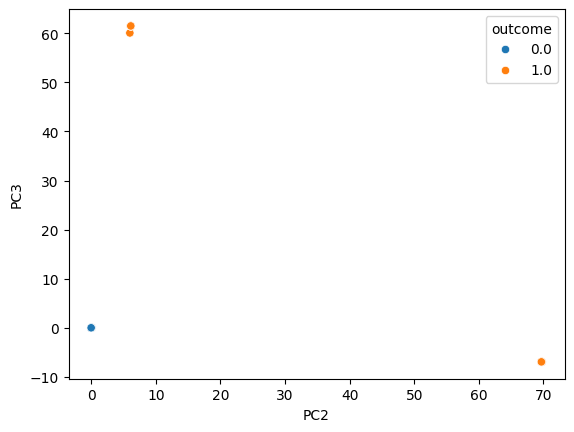

In [103]:
sns.scatterplot(
    data=xformNd,
    x="PC2",y="PC3",hue=labels
)

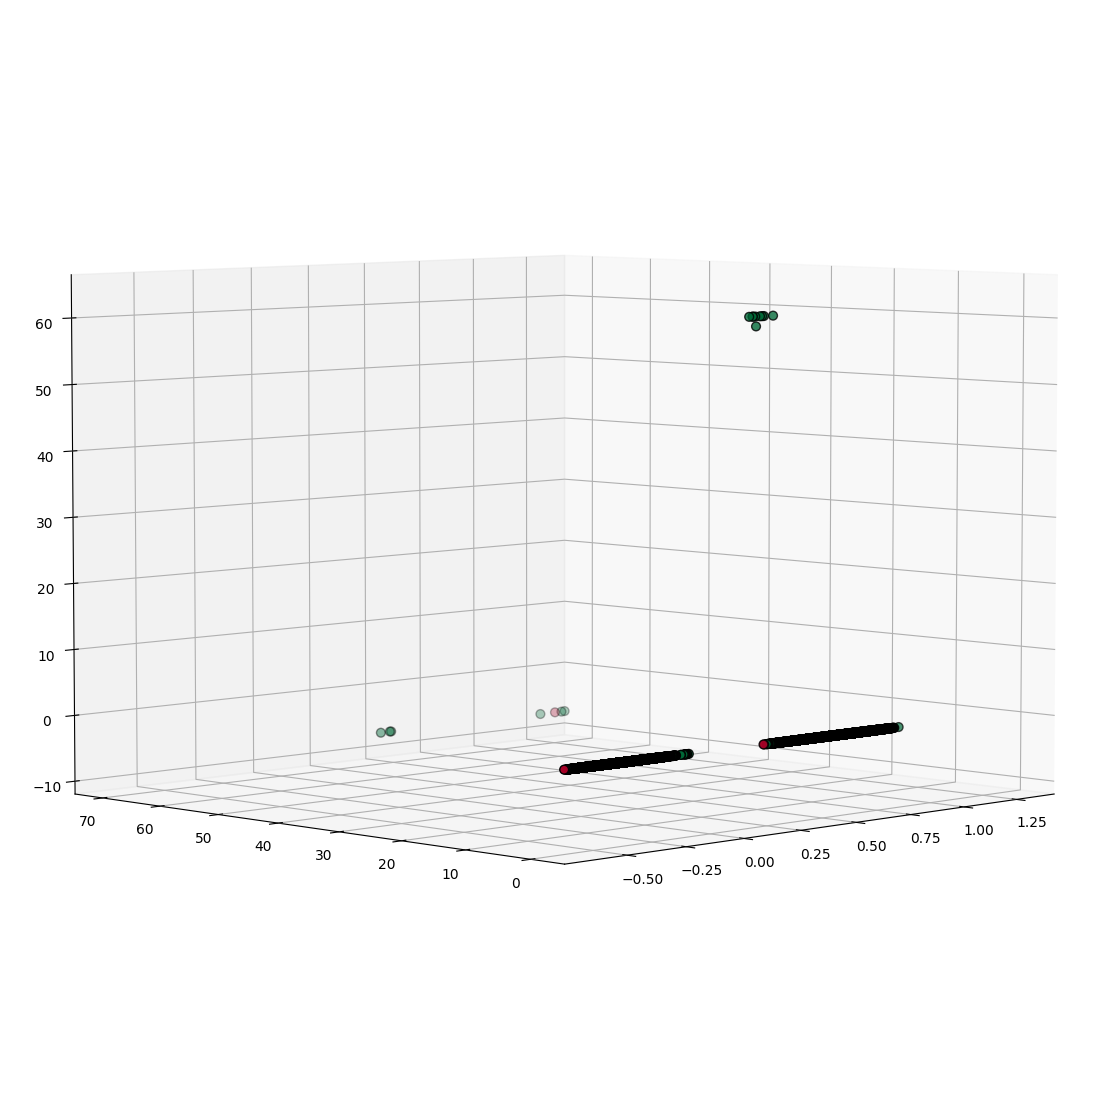

In [104]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig,rect=[0,0,.9,1],elev=5,azim=225)
fig.add_axes(ax)

x,y,z=xformNd['PC1'],xformNd['PC2'],xformNd['PC3'],

ax.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=40, c=labels.astype(int))

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

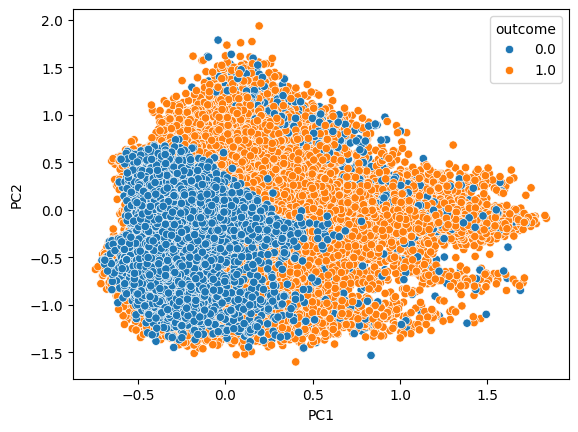

In [102]:
# xformNd_nr.columns = ["PC{}".format(i+1) for i in range(len(xformNd_nr.columns))]
sns.scatterplot(
    data=xformNd_nr,
    x="PC1",y="PC2",hue=labels
)

In [25]:
help(MCA.__init__)

Help on function __init__ in module prince.mca:

__init__(self, n_components=2, n_iter=10, copy=True, check_input=True, random_state=None, engine='sklearn', one_hot=True)
    Initialize self.  See help(type(self)) for accurate signature.



In [26]:
fr.columns

Index(['derived_sex', 'purchaser_type', 'preapproval',
       'open-end_line_of_credit', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'total_loan_costs', 'origination_charges',
       'discount_points', 'lender_credits', 'loan_term', 'intro_rate_period',
       'property_value', 'total_units', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity_observed', 'co-applicant_ethnicity_observed',
       'applicant_race_observed', 'co-applicant_race_observed',
       'applicant_sex', 'co-applicant_sex', 'applicant_sex_observed',
       'co-applicant_sex_observed', 'applicant_age', 'co-applicant_age',
       'tract_population', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units', 'company'],
      dtype='object')

In [27]:
# mca3d.column_contributions_.sort_values(
#     by=0,ascending=False
# ).reset_index().head(30)


fr = pd.read_csv('../data/final_clean.csv')
xform3d.columns = ['PC{}'.format(i+1) for i in range(3)]
xform3d['outcome'] = fr['outcome']



<Axes: xlabel='PC1', ylabel='PC2'>

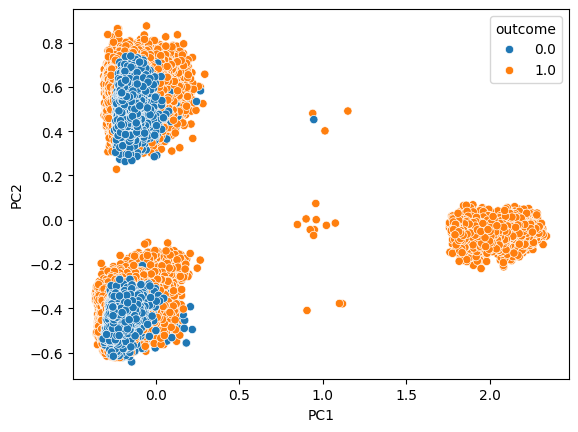

In [28]:
sns.scatterplot(
    data=xform3d,
    x='PC1',y='PC2',hue='outcome'#,size=xform3d['outcome']
)

In [50]:
mcaNd.column_contributions_.reset_index().sort_values(by=3,ascending=False).head(30)

,index,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
120,co-applicant_sex_observed_1,0.000003,0.000245,0.087408,0.078371,3.011954e-04,0.000077,0.000637,0.000157,0.000281,...,0.000004,0.000019,0.000451,0.001172,0.000905,0.000187,0.002112,2.118918e-04,9.222226e-04,5.044086e-05
95,co-applicant_ethnicity_observed_1,0.000004,0.000281,0.087302,0.078304,3.252810e-04,0.000119,0.000695,0.000137,0.000246,...,0.000007,0.000039,0.000417,0.001200,0.000944,0.000168,0.002358,2.181457e-04,8.768714e-04,7.082017e-05
102,co-applicant_race_observed_1,0.000005,0.000292,0.086206,0.076920,2.440676e-04,0.000143,0.000573,0.000127,0.000266,...,0.000001,0.000022,0.000436,0.001170,0.000986,0.000199,0.002317,1.821436e-04,1.176638e-03,4.257009e-05
92,applicant_ethnicity_observed_1,0.000020,0.000008,0.088581,0.076665,3.184651e-04,0.000058,0.000194,0.000103,0.000085,...,0.000024,0.000127,0.000480,0.001313,0.000741,0.000356,0.002699,1.424294e-04,9.388869e-04,9.153268e-05
117,applicant_sex_observed_1,0.000016,0.000008,0.088284,0.076302,2.782586e-04,0.000031,0.000132,0.000093,0.000079,...,0.000010,0.000163,0.000372,0.001272,0.000699,0.000311,0.002626,1.235949e-04,9.640820e-04,1.164792e-04
99,applicant_race_observed_1,0.000021,0.000009,0.087307,0.074917,2.168843e-04,0.000073,0.000087,0.000073,0.000075,...,0.000014,0.000149,0.000396,0.001321,0.000654,0.000315,0.002764,1.607012e-04,9.380836e-04,9.675991e-05
108,applicant_sex_3,0.000274,0.000055,0.057970,0.070093,9.413429e-07,0.007957,0.000003,0.001199,0.000023,...,0.000072,0.002831,0.003349,0.020276,0.027554,0.000027,0.034291,2.593502e-03,1.044394e-02,1.285645e-04
222,applicant_ethnicity_Information Not Provided,0.000564,0.000044,0.055004,0.064250,1.809040e-05,0.011237,0.000160,0.000639,0.000051,...,0.000056,0.000585,0.001136,0.014072,0.015470,0.000081,0.032309,1.769441e-03,9.094318e-03,5.439104e-04
113,co-applicant_sex_3,0.000116,0.004480,0.050061,0.060129,1.476510e-04,0.006855,0.000363,0.001293,0.000122,...,0.000239,0.002917,0.000155,0.014996,0.021523,0.000592,0.047998,1.235949e-03,1.053268e-02,1.201695e-03
195,applicant_race_Information not provided,0.000663,0.000085,0.051086,0.059593,1.881481e-04,0.006802,0.003456,0.000300,0.000669,...,0.000072,0.000324,0.001580,0.013719,0.014401,0.000158,0.033428,1.379673e-03,8.707216e-03,4.288907e-04


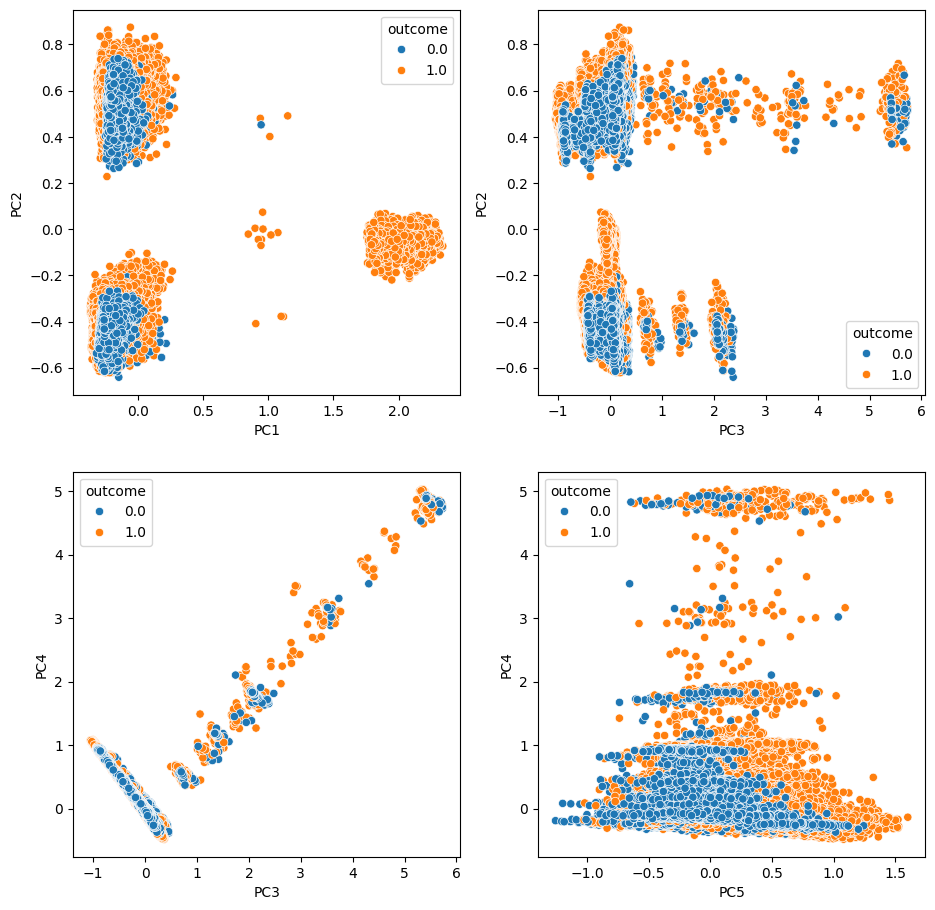

In [67]:
fig,ax=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(11)
fig.set_figwidth(11)
sns.scatterplot(data=xformNd,x='PC1',y='PC2',hue=fr['outcome'],ax=ax[0,0])
sns.scatterplot(data=xformNd,x='PC3',y='PC2',hue=fr['outcome'],ax=ax[0,1])
sns.scatterplot(data=xformNd,x='PC3',y='PC4',hue=fr['outcome'],ax=ax[1,0])
sns.scatterplot(data=xformNd,x='PC5',y='PC4',hue=fr['outcome'],ax=ax[1,1])
plt.show()

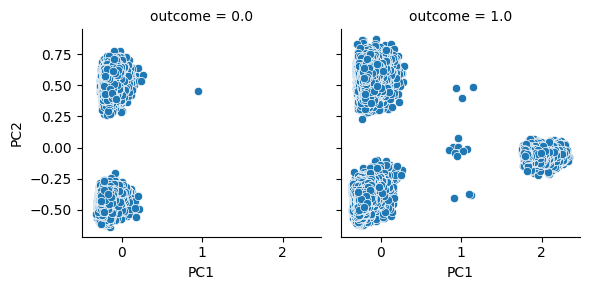

In [30]:
g = sns.FacetGrid(data=xform3d,col='outcome')
g.map_dataframe(sns.scatterplot,x='PC1',y='PC2')

In [31]:
inds = xform3d.loc[xform3d['PC1']> 0.5].index
inds2 = xform3d.loc[(xform3d['PC2'] < 0) & (xform3d['PC1']<1)].index
inds3 = xform3d.loc[(xform3d['PC2'] > 0) & (xform3d['PC1']<1)].index
xform3d['gr'] = 0
xform3d.loc[inds,'gr'] = 1
xform3d.loc[inds2,'gr'] = 2
xform3d.loc[inds3,'gr'] = 3
xform3d.to_csv('../data/3dmca.csv',index=False)


In [32]:
fr['gr'] = 0
fr.loc[inds,'gr'] = 1
fr.loc[inds2,'gr'] = 2
fr.loc[inds3,'gr'] = 3
fr[fr['gr']==2]

,state_code,county_code,derived_sex,action_taken,purchaser_type,preapproval,open-end_line_of_credit,loan_amount,loan_to_value_ratio,interest_rate,...,applicant_race,co-applicant_race,applicant_ethnicity,co-applicant_ethnicity,aus,denial_reason,outcome,company,income_from_median,gr
0,IL,17037.0,Male,6,1,2,2,205000.0,91.111111,6.125,...,32768,262144,32,256,64,512,1.0,JP Morgan,False,2
1,IL,17043.0,Male,6,3,2,2,305000.0,88.405797,7.000,...,32768,262144,32,256,64,512,1.0,JP Morgan,False,2
2,WI,55133.0,Female,6,3,2,2,155000.0,93.939394,6.250,...,32768,262144,32,256,64,512,1.0,JP Morgan,False,2
3,WI,55059.0,Male,6,3,2,2,175000.0,52.238806,6.875,...,32768,262144,32,256,64,512,1.0,JP Morgan,False,2
4,RI,44003.0,Female,6,3,2,2,165000.0,50.769231,7.125,...,32768,262144,32,256,64,512,1.0,JP Morgan,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242258,TX,48121.0,Male,3,0,2,2,645000.0,73.000000,6.500,...,6,262144,32,256,1,16,0.0,Rocket Mortgage,False,2
242259,GA,13121.0,Male,3,0,2,2,145000.0,97.000000,6.500,...,512,262144,32,256,1,8,0.0,Rocket Mortgage,False,2
242260,CA,6001.0,Female,3,0,2,2,725000.0,70.000000,6.625,...,32768,262144,32,256,1,64,0.0,Rocket Mortgage,False,2
242262,TX,48121.0,Sex Not Available,3,0,2,2,515000.0,60.000000,6.500,...,65536,262144,64,256,1,32,0.0,Rocket Mortgage,False,2


<Axes: xlabel='PC1', ylabel='PC2'>

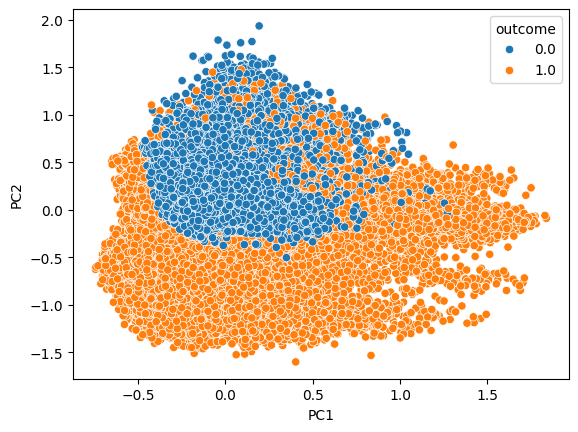

In [31]:
xform3d_nr.columns = ['PC{}'.format(i+1) for i in range(3)]
xform3d_nr['outcome'] = fr['outcome']
sns.scatterplot(
    data=xform3d_nr,
    x='PC1',y='PC2',hue='outcome'#,size=xform3d_nr['outcome']
)

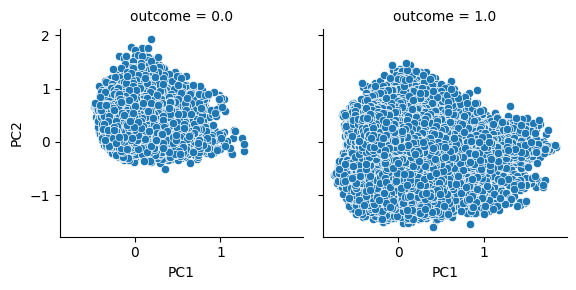

In [32]:
g = sns.FacetGrid(data=xform3d_nr,col='outcome')
g.map_dataframe(sns.scatterplot,x='PC1',y='PC2')

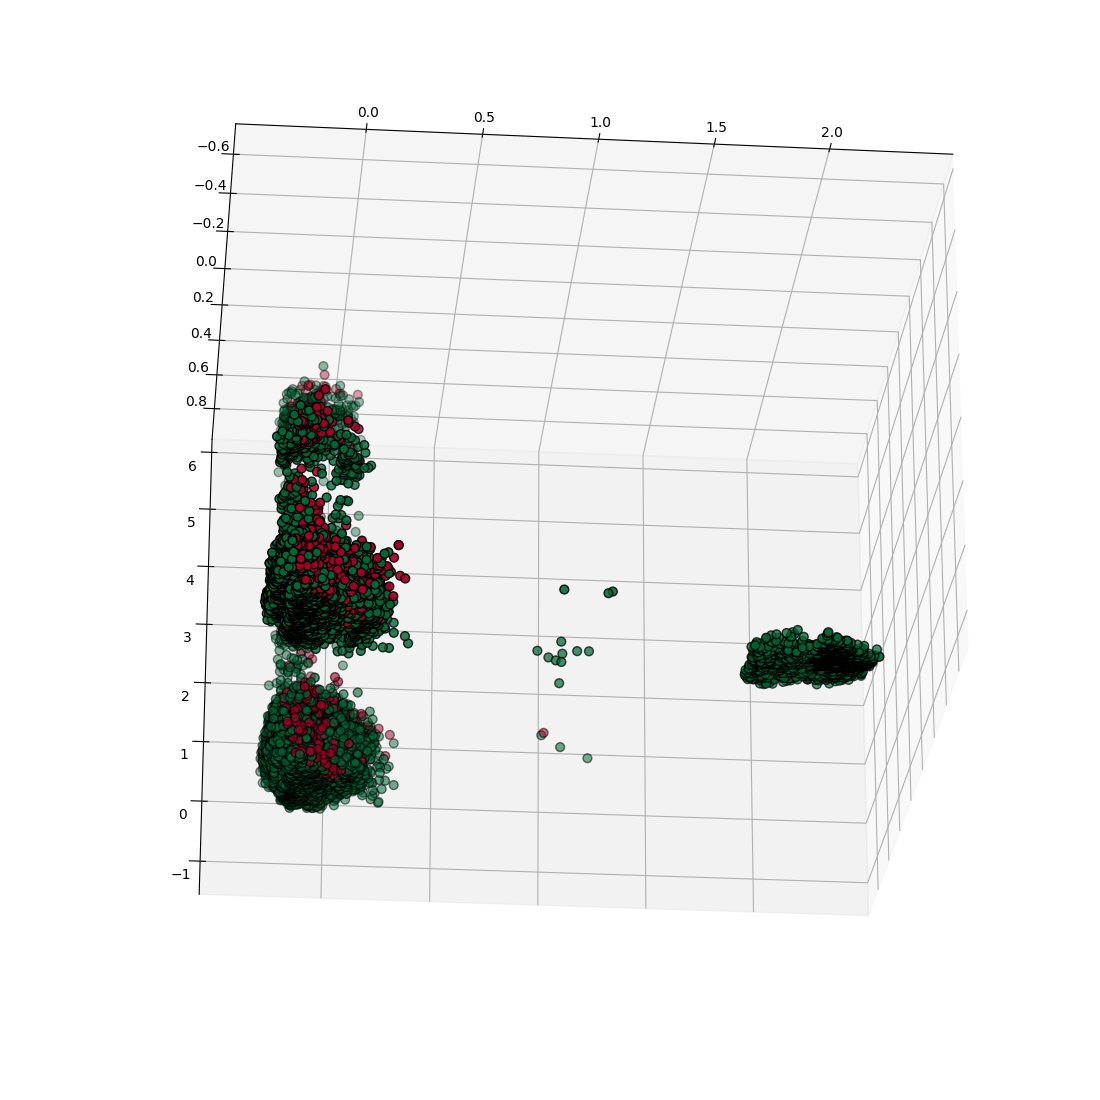

In [33]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig,rect=[0,0,.9,1],elev=-25,azim=265)

fig.add_axes(ax)

x=xform3d['PC1']
y=xform3d['PC2']
z=xform3d['PC3']
r=xform3d['outcome']

ax.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=40, c=r.astype(int))

plt.show()

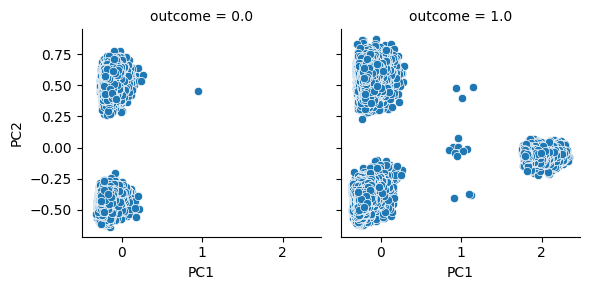

In [133]:
g = sns.FacetGrid(data=xform3d,col='outcome')
g.map_dataframe(
    sns.scatterplot,
    x='PC1',y='PC2'
)